# Logistic Regression - Classification



The idea is to form a function based on the features:

<center>$y=\theta*\phi(x)+\theta_0$</center>

And then use the value to predict the class.

> E.g. In the case of analyzing the StressDataset, we can write:

>> $y=\theta_0+\theta_1*(Wife Salary)+\theta_2*(Husband Salary)$

>> one way to predict the class is to say when Y is positive is one class when negative another class.

>>$Class=Sign(y)$



Logistic Regression has two important characteristics:

1. Use of sigmoid function.

>> What is sigmoid function $Sig(x)$?

>> 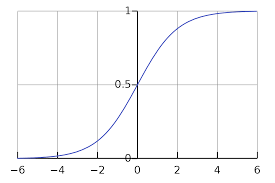

>> Sigmoid will transfom the scors to probablities:

<center>$h_\theta(x)=Sig(\theta*\phi(x)+\theta_0)$</center>

>> Now based on some threshold on probability, we can assign classes

2. Uses Logistic Cost Function:

>> 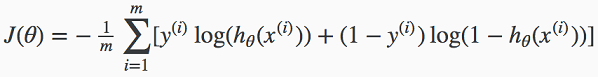

>> Source: https://medium.com/@madhusanjeevi.ai/chapter-2-1-84838d48647c

>> 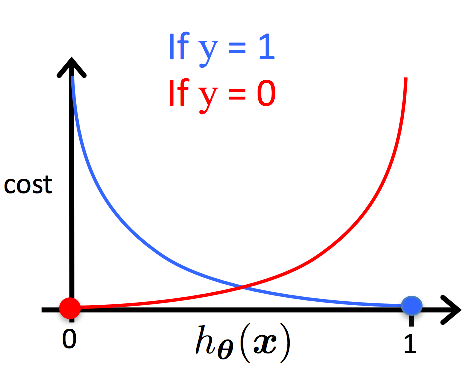

>>Source: https://datascience.stackexchange.com/questions/40982/logistic-regression-cost-function

Read more:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
import numpy as np
import pandas as pd

## Load Data

In [ ]:
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/StressDataset.txt',delimiter='\t')

In [ ]:
data=data.rename(columns={'Wife Salary':'X', 'Husband Salary':'Y', 'Stressed':'L'})

## Pre-processing

### Visualize Data

Text(0.5, 1.0, 'Stressed Dataset')

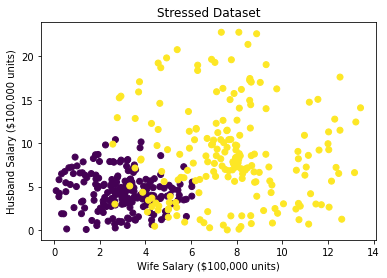

In [ ]:
import matplotlib.pyplot as plt
#plot not stressed class
plt.scatter(data['X'], data['Y'],c=data['L'])
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Stressed Dataset')

### Split Data


In [ ]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(data[['X','Y']], data['L'], test_size=0.3)

### Normalize Data

Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['X','Y']])
X_training_scaled = scaler.transform(X_training)
X_testing_scaled = scaler.transform(X_testing)

## Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_training_scaled,Y_training)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_testing_predicted=model.predict(X_testing_scaled)
Y_training_predicted=model.predict(X_training_scaled)

## Result Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [ ]:
print('LGC result:')
print('Accuracy: ',accuracy_score(Y_testing,Y_testing_predicted))
print('f1_score: ',f1_score(Y_testing,Y_testing_predicted))
print('Precision: ', precision_score(Y_testing,Y_testing_predicted))
print('Recall: ', recall_score(Y_testing,Y_testing_predicted))


LGC result:
Accuracy:  0.8583333333333333
f1_score:  0.859504132231405
Precision:  0.9122807017543859
Recall:  0.8125


For reference: 

The result below were taken from one of the runs of MDC and KNN


> MDC result:
>> 0.8666666666666667

>> 0.9649122807017544

>> 0.7971014492753623


> KNN result:
>> 0.9083333333333333

>> 0.967741935483871

>> 0.8695652173913043

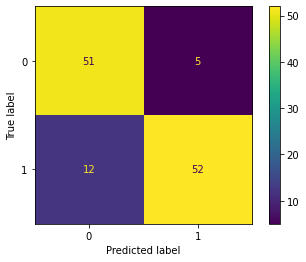

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_testing_scaled,Y_testing)

### Decision boundary

In [ ]:
x_grid=np.arange(0,15,0.1)
y_grid=np.arange(0,25,0.1)


'''
Alternatively, You can do it using numpy

xx,yy=np.meshgrid(x_grid,y_grid)
data_grid = np.array([xx, yy]).reshape(2, -1).T

'''

data_grid=[[i,j] for j in y_grid for i in x_grid]
Y_grid_predicted=model.predict(scaler.transform(data_grid))

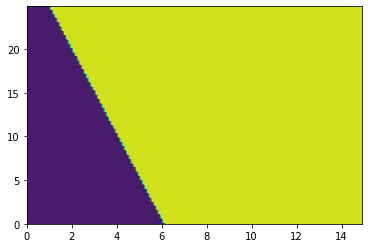

In [ ]:
plt.contourf(x_grid,y_grid,Y_grid_predicted.reshape(y_grid.shape[0],x_grid.shape[0]))

### Visualise TP/TN/FP/FN

<Figure size 432x288 with 0 Axes>

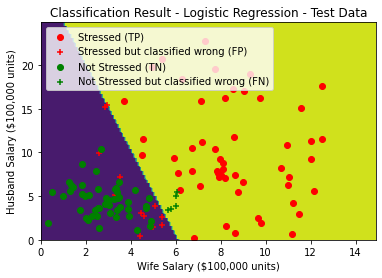

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.contourf(x_grid,y_grid,Y_grid_predicted.reshape(y_grid.shape[0],x_grid.shape[0]))

#True Positive - Stressed and classified as stressed
plt.scatter(X_testing['X'][Y_testing+Y_testing_predicted==2],X_testing['Y'][Y_testing+Y_testing_predicted==2],label='Stressed (TP)',color='red')
#False Positive - Stressed and classified worng
plt.scatter(X_testing['X'][Y_testing>Y_testing_predicted],X_testing['Y'][Y_testing>Y_testing_predicted],label='Stressed but classified wrong (FP)',marker='+',color='red')

#True Negative - Not Stressed and classified as stressed
plt.scatter(X_testing['X'][Y_testing+Y_testing_predicted==0],X_testing['Y'][Y_testing+Y_testing_predicted==0],label='Not Stressed (TN)',color='green')
#False Negative - Not Stressed and classified wrong
plt.scatter(X_testing['X'][Y_testing<Y_testing_predicted],X_testing['Y'][Y_testing<Y_testing_predicted],label='Not Stressed but classified wrong (FN)',marker='+',color='green')

plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Classification Result - Logistic Regression - Test Data')
plt.legend()
plt.figure()

